# [Gradient decent](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Lectures/L1-Gradient_descent.ipynb)

## Simulate data

In [1]:
import pandas
import numpy
import matplotlib.pyplot as pyplot

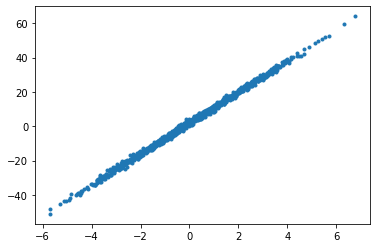

In [2]:
samples = 1000

X = 2 * numpy.random.randn(samples, 1)
noise = numpy.random.randn(samples, 1)
y = 2 + 9*X + noise

pyplot.plot(X,y, '.')

In [3]:
X[:5]

array([[-0.74067594],
       [ 0.30605298],
       [-1.92278177],
       [ 1.60880668],
       [-1.19132795]])

In [4]:
X = numpy.c_[numpy.ones(samples), X] # c_ = concatenates
X[:5]

array([[ 1.        , -0.74067594],
       [ 1.        ,  0.30605298],
       [ 1.        , -1.92278177],
       [ 1.        ,  1.60880668],
       [ 1.        , -1.19132795]])

## Train|test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

In [6]:
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m = len(X)
    weights = numpy.random.randn( # random.randn är random normal distribution
        X.shape[1], 1
    ) 

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ weights - y)
        weights -= learning_rate*gradient

    return weights

weights = gradient_descent(X_train, y_train)

weights, weights.reshape(-1)

(array([[1.93481755],
        [8.98300475]]),
 array([1.93481755, 8.98300475]))

In [10]:
epochs = numpy.arange(1, 200)
weights = numpy.array(
    [gradient_descent(X_train, y_train, epochs=epochs).reshape(-1) for epochs in epochs]
)
weights.shape

(199, 2)

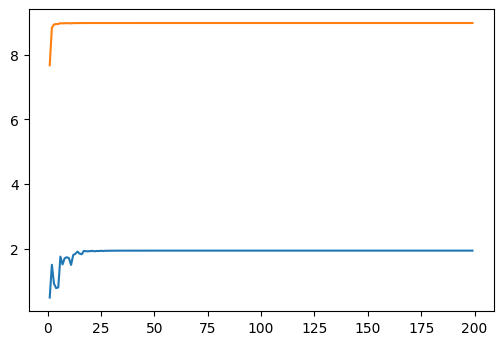

In [11]:
fig, ax = pyplot.figure(dpi=100), pyplot.axes()
ax.plot(epochs, weights)

## Stochastic gradient descent

In [9]:
epochs = 10
t0, t1 = 5, 50 # learning schedule parameters

def learning_rate_schedule(t):
    """Decrease learning rate as training progresses"""
    return t0/(t+t1)

weights = numpy.random.randn(2,1)
m = len(X_train)

for epoch in range (epochs):
    for i in range(m):
        random_index = numpy.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(weights) - y_i)
        eta = learning_rate_schedule(epoch* + i)
        weights -= eta*gradients

weights

array([[1.92496954],
       [8.92747942]])